In [1]:
# Lynda.com
# Python: Data Analysis

# Chapter 7: Baby Names with Pandas
# Challenge:

# From a list of baby names maintained by the Social Security Administration:
# 1) Compute the number of times that each name was used, separately for boys and girls
# 2) Identify the unisex names where the ratio between boys' and girls' totals is between 1-to-4 and 4-to-1
# 3) Plot popularity vs. year for the top ten unisex names

# See GitHub repository readme for additional introductory comments

In [2]:
# Import all packages needed for this task

# from datetime import datetime # Record data download time
# import urllib.request # Download data

# from random import sample # Look at random entries of raw data; use np.random.choice() for arrays

import numpy as np # For data analysis
import pandas as pd # For data analysis
import matplotlib.pyplot as pp # Plot data

import zipfile # Unzip data

import os # Look up files in directory

In [3]:
# Keep all plots inline

%matplotlib inline

In [4]:
# Data in form of zip file names.zip is available from multiple government websites
# For example at https://www.ssa.gov/oact/babynames/limits.html
# Once I googled the list of names, it was easier to download the file directly (rather than ftp)

# Extract its contents into folder 'names' in parent directory ('.')

zipfile.ZipFile('names.zip').extractall('./names')

In [5]:
# Look at (sorted) list of unzipped files

sorted(os.listdir('names'))

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [6]:
# Let's take a look at the first ten lines for one of the years, say the last year on record

open('names/yob2017.txt','r').readlines()[:10]

# For ten random lines in the same file, use:
# sample(open('names/yob2017.txt','r').readlines(), 10)

['Emma,F,19738\n',
 'Olivia,F,18632\n',
 'Ava,F,15902\n',
 'Isabella,F,15100\n',
 'Sophia,F,14831\n',
 'Mia,F,13437\n',
 'Charlotte,F,12893\n',
 'Amelia,F,11800\n',
 'Evelyn,F,10675\n',
 'Abigail,F,10551\n']

In [7]:
# Format the csv file to a Pandas DataFrame

# We need to specify the column headers so they do not default to the first line

# To save memory space, we set the data type of the total number of babies to unsigned integer
# uint32 (0 to 4294967295) should do
# uint16 is 0 to 65535 and may or may not be enough for later totals (it is not)
# This doesn't decrease the size of the DataFrame dramatically, but it's a worthwhile consideration

# We could do something similar for the two objects/strings

# From readme file ./names/NationalReadMe.pdf:
# Each record in the individual annual files has the format "name,sex,number," where name is 2 to 15
# characters, sex is M (male) or F (female) and "number" is the number of occurrences of the name

names2017 = pd.read_csv('names/yob2017.txt', names = ['name', 'sex', 'number'], dtype = {'number': np.uint32})

# Let's take a quick look at the resulting Pandas DataFrame

names2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32469 entries, 0 to 32468
Data columns (total 3 columns):
name      32469 non-null object
sex       32469 non-null object
number    32469 non-null uint32
dtypes: object(2), uint32(1)
memory usage: 634.2+ KB


In [8]:
# Let's again take a quick look at the first ten lines

# From readme file NationalReadMe.pdf:
# Each file is sorted first on sex and then on number of occurrences in descending order
# When there is a tie on the number of occurrences, names are listed in alphabetical order

# Data only includes cases where the individual has a Social Security Number (for obvious reasons)
# To safeguard privacy, lists are restricted to names with at least 5 occurrences

names2017.head(10)

,name,sex,number
0,Emma,F,19738
1,Olivia,F,18632
2,Ava,F,15902
3,Isabella,F,15100
4,Sophia,F,14831
5,Mia,F,13437
6,Charlotte,F,12893
7,Amelia,F,11800
8,Evelyn,F,10675
9,Abigail,F,10551


In [9]:
# Make a list (of DataFrames) with data from all available years (1880 - 2017)
# Then convert the list to a single Pandas DataFrame using the concat() method

names_all = [] # start with empty list

for year in range(1880, 2017+1):
    # append all years
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),
                                 names = ['name', 'sex', 'number'],
                                 dtype = {'number': np.uint32}))
    # Add a new column for the year
    names_all[-1]['year'] = year
    # Convert type as for 'number' above
    # There should be a better way, but this will do for the time being
    names_all[-1]['year'] = names_all[-1]['year'].astype(np.uint16)

all_years = pd.concat(names_all)

all_years.info()

# The DataFrame uses about 25% less memory than the same DataFrame without the dtype declarations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924665 entries, 0 to 32468
Data columns (total 4 columns):
name      object
sex       object
number    uint32
year      uint16
dtypes: object(2), uint16(1), uint32(1)
memory usage: 55.1+ MB


In [10]:
# Let's take a quick look at the head of the DataFrame

all_years.head(10)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [11]:
# Add the total number of occurences of each name as male and female separately over all years
# It does not make sense to add up years, so drop that column

totals_by_sex = all_years.groupby(['name', 'sex']).sum().drop('year', axis = 1)

# This DataFrame is the solution to the first part of the challenge:
# 1) Compute the number of times that each name was used, separately for boys and girls

In [12]:
totals_by_sex.head(12) # no unisex names among the top ten entries

,,number
name,sex,
Aaban,M,107
Aabha,F,35
Aabid,M,10
Aabir,M,5
Aabriella,F,32
Aada,F,5
Aadam,M,254
Aadan,M,130
Aadarsh,M,199


In [13]:
# We next want to single out unisex names, so we unstack the multi-index
# Also replace NaN by zero (this isn't really necessary for our purposes, but looks nicer)

totals_unstacked = totals_by_sex.unstack().fillna(0)

In [14]:
# Let's take a look

totals_unstacked.head(10)

number        
sex            F       M
name                    
Aaban        0.0   107.0
Aabha       35.0     0.0
Aabid        0.0    10.0
Aabir        0.0     5.0
Aabriella   32.0     0.0
Aada         5.0     0.0
Aadam        0.0   254.0
Aadan        0.0   130.0
Aadarsh      0.0   199.0
Aaden        5.0  4653.0

In [15]:
# By definition, a unisex name occurs both as male and female
# Let's remove those names from the list that occured as male only or female only

unisex_names = totals_unstacked[(totals_unstacked['number']['F'] > 0) & (totals_unstacked['number']['M'] > 0)]

In [16]:
# Let's see what the new list looks like

unisex_names.head(10)

number        
sex            F       M
name                    
Aaden        5.0  4653.0
Aadi        16.0   811.0
Aadyn       16.0   492.0
Aalijah    142.0   194.0
Aaliyah  83580.0    96.0
Aaliyan    103.0     5.0
Aamari      86.0   117.0
Aamir        6.0  1841.0
Aaren      282.0   801.0
Aareon      10.0    33.0

In [17]:
unisex_names.tail(10)

number        
sex         F       M
name                 
Zyair   109.0   849.0
Zyaire  510.0  2316.0
Zyan    285.0   885.0
Zyian    49.0    35.0
Zyien    12.0    54.0
Zyion   159.0   851.0
Zyon    595.0  2439.0
Zyonn     5.0    28.0
Zyree    16.0    81.0
Zyrie    19.0    11.0

In [18]:
# Out of curiosity, let's see how many unisex names are (left) on the list

unisex_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10663 entries, Aaden to Zyrie
Data columns (total 2 columns):
(number, F)    10663 non-null float64
(number, M)    10663 non-null float64
dtypes: float64(2)
memory usage: 249.9+ KB


In [19]:
# We are only interested in those unisex names that are not skewed towards male or female
# In this challenge, the desired balance between male and female occurences is 1-to-4 either way

# We could make the ratio comparison without divisions
# But for ease of readability, let's create the simplest possible boolean mask

ratio = unisex_names['number']['F'] / unisex_names['number']['M']
balanced = (ratio > .25) & (ratio < 4)

In [20]:
# Let's create a new DataFrame from the unisex names that only contains the names that are "genuinely" unisex

unisex_names_bal = unisex_names[balanced]

# This DataFrame is our solution to the second part of the challenge
# 2) Identify the unisex names where the ratio between boys' and girls' totals is between 1-to-4 and 4-to-1

In [21]:
unisex_names_bal.head(10)

number       
sex           F      M
name                  
Aalijah   142.0  194.0
Aamari     86.0  117.0
Aaren     282.0  801.0
Aareon     10.0   33.0
Aari        9.0   10.0
Aarian     59.0  116.0
Aarin     302.0  540.0
Aarion    140.0  468.0
Aaris      47.0   42.0
Aaryn    1090.0  663.0

In [22]:
unisex_names_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3173 entries, Aalijah to Zyrie
Data columns (total 2 columns):
(number, F)    3173 non-null float64
(number, M)    3173 non-null float64
dtypes: float64(2)
memory usage: 74.4+ KB


In [23]:
# Last but not least, we can create our list of top ten unisex names (by total occurences across all years)

# First sum the columns 'F' and 'M' (axis = 1), then sort in descending order, and grab the top ten
unisex_names_total = unisex_names_bal.sum(axis = 1).sort_values(ascending = False)[:10]

In [24]:
# For plotting purposes, let's create an array that we can then loop over

names = unisex_names_total.index.values

# This is our list of top ten unisex names

names

# Note that our analysis complete ignores name variants (same name with different spelling)
# In a more sophisticated approach, one could build a dictionary of name variants
# A list of name variants can probably be found in the vastness of the internet

array(['Willie', 'Jordan', 'Taylor', 'Leslie', 'Jamie', 'Angel', 'Lee',
       'Jessie', 'Marion', 'Dana'], dtype=object)

In [25]:
# Let's select these ten names from the original DataFrame all_years
# We index the DataFrame by name, sex, and year, then select the names from the list

all_years_top_ten = all_years.set_index(['name', 'sex', 'year']).loc[names].sort_index()

In [26]:
all_years_top_ten.head(10)

number
name  sex year        
Angel F   1894       5
          1907       6
          1908       7
          1909       6
          1912       8
          1913       7
          1914       7
          1915      10
          1916      15
          1917      11

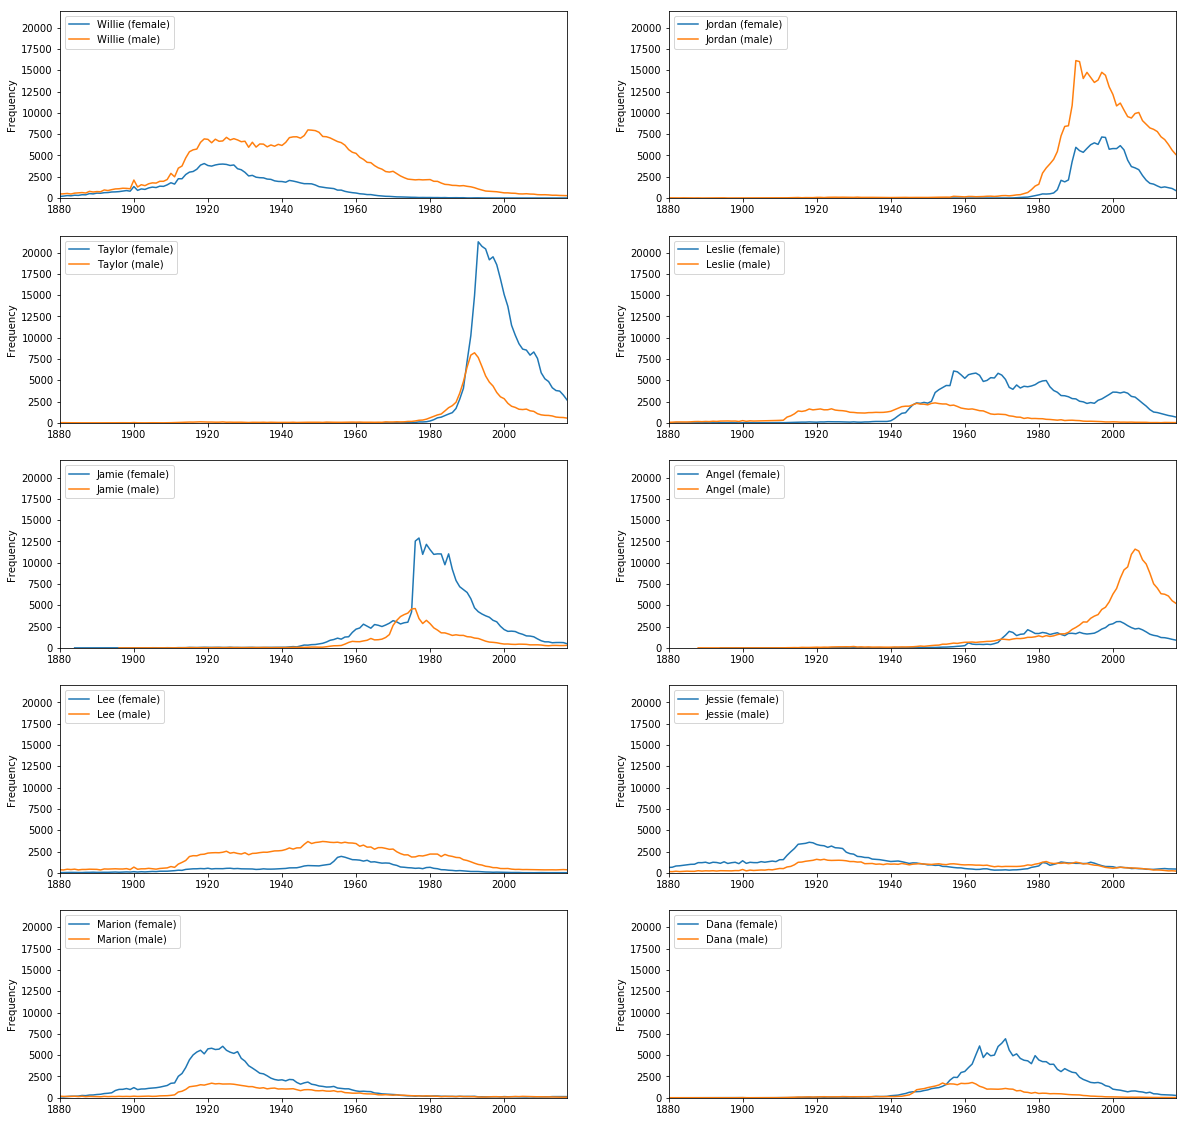

In [27]:
# Time to plot popularity vs. year for the top ten unisex names
# That is the final part of the challenge:
# 3) Plot popularity vs. year for the top ten unisex names

# This plot isn't anything too fancy, but a good starting point

pp.figure(figsize = (20,20)) # Resize the total plot so that the individual subplots are not too small

# Create a subplot for each name on the list of top ten unisex names
for i, name in enumerate(names):
    # Arguments = number of rows and columns, and index of subplot, respectively
    # Index is left to right, top to bottom, in rows x columns size matrix
    pp.subplot(5,2,i+1)

    pp.axis(xmin=1880) # First year
    pp.axis(xmax=2017) # Last year
    pp.axis(ymin=0)
    pp.axis(ymax=22000) # For ease of comparison; remove to emphasize individual charts

    # pp.xlabel('Year') # Seems redundant
    pp.ylabel('Frequency') # Maybe this is self-explaining, but let's leave it in for now

    pp.plot(all_years_top_ten.loc[name, 'F'].index, all_years_top_ten.loc[name, 'F'].values)
    pp.plot(all_years_top_ten.loc[name, 'M'].index, all_years_top_ten.loc[name, 'M'].values)

    pp.legend([name + ' (female)', name + ' (male)'], loc = 'upper left')
    
    # pp.title('Popularity vs. year for {} ({}. of top ten unisex names)'.format(name, i+1))